<a href="https://colab.research.google.com/github/Sam54000/vibro-tactile-P300-lockedIn-patient/blob/main/Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scipy --upgrade

     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
!pip install tsaug

In [ ]:
#!pip install pycausalimpact

In [3]:
import numpy as np
import pandas as pd
 
import os
import glob
 
import scipy.io as spio

import matplotlib.pyplot as plt
import matplotlib.collections as collections
 
import tensorflow as tf
import tensorflow.feature_column as fc
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
!pip install pyriemann
!pip install mne
import pyriemann
from sklearn.model_selection import cross_val_score

     |████████████████████████████████| 42 kB 667 kB/s 
  Created wheel for pyriemann: filename=pyriemann-0.2.7-py2.py3-none-any.whl size=49770 sha256=86d600d547e12d4fb26dc6531f7d6ebb797fc3d8a376ff89d63a1d6cfc278d02
  Stored in directory: /root/.cache/pip/wheels/5c/b7/55/27dcb08ed8fb58da8c1be108c23928ffb9125c9c1da2ddfb53
Successfully built pyriemann
     |████████████████████████████████| 7.5 MB 5.2 MB/s 


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Constants
EEG_CHANNELS = ["Fz", "C3", "Cz", "C4", "CP1", "CPz", "CP2", "Pz"]
dir = "/content/drive/MyDrive/Locked-In/Data"

Load Data

In [6]:
os.chdir(dir)
os.getcwd()

'/content/drive/MyDrive/Locked-In/Data'

In [7]:
mat_files = glob.glob('*.mat')
mat_files

['P1_high1.mat',
 'P2_low1.mat',
 'P2_high1.mat',
 'P2_high2.mat',
 'P2_low2.mat',
 'P1_high2.mat',
 'P1_low1.mat',
 'P1_low2.mat']

In [8]:
mat_file = spio.loadmat(mat_files[0])
keys = [key for key, values in mat_file.items() if key != '__header__' and key != '__version__' and key != '__globals__' ]
cleaned_mat_file = {i:mat_file[i] for i in mat_file if i in keys}
channel_data = pd.DataFrame(cleaned_mat_file["y"], columns=EEG_CHANNELS)
fs = pd.DataFrame(cleaned_mat_file["fs"])[0][0]
channel_data.head()
outputs = cleaned_mat_file["trig"]

In [9]:
eeg_recordings = {}
for mat_file_name in mat_files:
  mat_file = spio.loadmat(mat_file_name)
  keys = [key for key, values in mat_file.items() if key != '__header__' and key != '__version__' and key != '__globals__' ]
  cleaned_mat_file = {i:mat_file[i] for i in mat_file if i in keys}
  channel_data = pd.DataFrame(cleaned_mat_file["y"], columns=EEG_CHANNELS)
  channel_data["output"] = cleaned_mat_file["trig"]
  channel_data["output"] = channel_data["output"].replace([-1], 3)
  channel_data.astype({"output": "int32"})
  eeg_recordings[mat_file_name] = channel_data

Distractor - 3
Non target - 1
Target - 2

In [10]:
sample_data = eeg_recordings["P2_low2.mat"]
sample_data

,Fz,C3,Cz,C4,CP1,CPz,CP2,Pz,output
0,-18.198307,-41.679142,-58.040730,-28.957844,-45.758099,-39.229214,-49.859024,-24.768824,0
1,-20.113195,-42.527195,-59.256149,-30.186872,-47.145695,-40.757290,-51.395859,-25.748331,0
2,-21.264162,-42.744385,-59.901157,-31.081549,-48.150112,-42.143810,-52.995609,-26.235826,0
3,-21.481592,-42.307217,-60.127342,-31.577698,-48.578995,-43.137711,-54.385029,-26.291319,0
4,-20.914345,-41.543095,-60.199566,-31.790014,-48.486229,-43.609638,-55.377396,-26.268978,0
...,...,...,...,...,...,...,...,...,...
39899,-22.427023,-7.066786,-8.480715,-11.711740,-3.986313,-10.272511,-16.349691,-12.297679,0
39900,-21.098677,-6.132523,-7.287198,-10.273462,-3.388305,-9.055482,-14.875256,-10.983068,0
39901,-19.748150,-4.906825,-5.996058,-8.878644,-2.713736,-7.944721,-13.645805,-10.435642,0
39902,-18.376886,-3.759302,-4.738688,-7.595037,-1.934436,-7.085990,-12.773139,-10.569434,0


(1000.0, 5000.0)

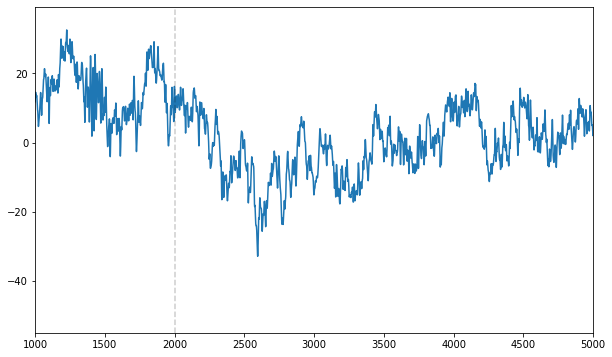

In [100]:
plt.figure(figsize=(10,6))
v = sample_data['C3']
plt.plot(v)
plt.axvline(2000, c='k', alpha=0.2, linestyle="--")
plt.xlim([1000,5000])

[0.00000000e+00 3.90625000e-03 7.81250000e-03 ... 1.55863281e+02
 1.55867188e+02 1.55871094e+02]


,Fz,C3,Cz,C4,CP1,CPz,CP2,Pz,output
0,-18.198307,-41.679142,-58.040730,-28.957844,-45.758099,-39.229214,-49.859024,-24.768824,0
1,-20.113195,-42.527195,-59.256149,-30.186872,-47.145695,-40.757290,-51.395859,-25.748331,0
2,-21.264162,-42.744385,-59.901157,-31.081549,-48.150112,-42.143810,-52.995609,-26.235826,0
3,-21.481592,-42.307217,-60.127342,-31.577698,-48.578995,-43.137711,-54.385029,-26.291319,0
4,-20.914345,-41.543095,-60.199566,-31.790014,-48.486229,-43.609638,-55.377396,-26.268978,0
...,...,...,...,...,...,...,...,...,...
39899,-22.427023,-7.066786,-8.480715,-11.711740,-3.986313,-10.272511,-16.349691,-12.297679,0
39900,-21.098677,-6.132523,-7.287198,-10.273462,-3.388305,-9.055482,-14.875256,-10.983068,0
39901,-19.748150,-4.906825,-5.996058,-8.878644,-2.713736,-7.944721,-13.645805,-10.435642,0
39902,-18.376886,-3.759302,-4.738688,-7.595037,-1.934436,-7.085990,-12.773139,-10.569434,0


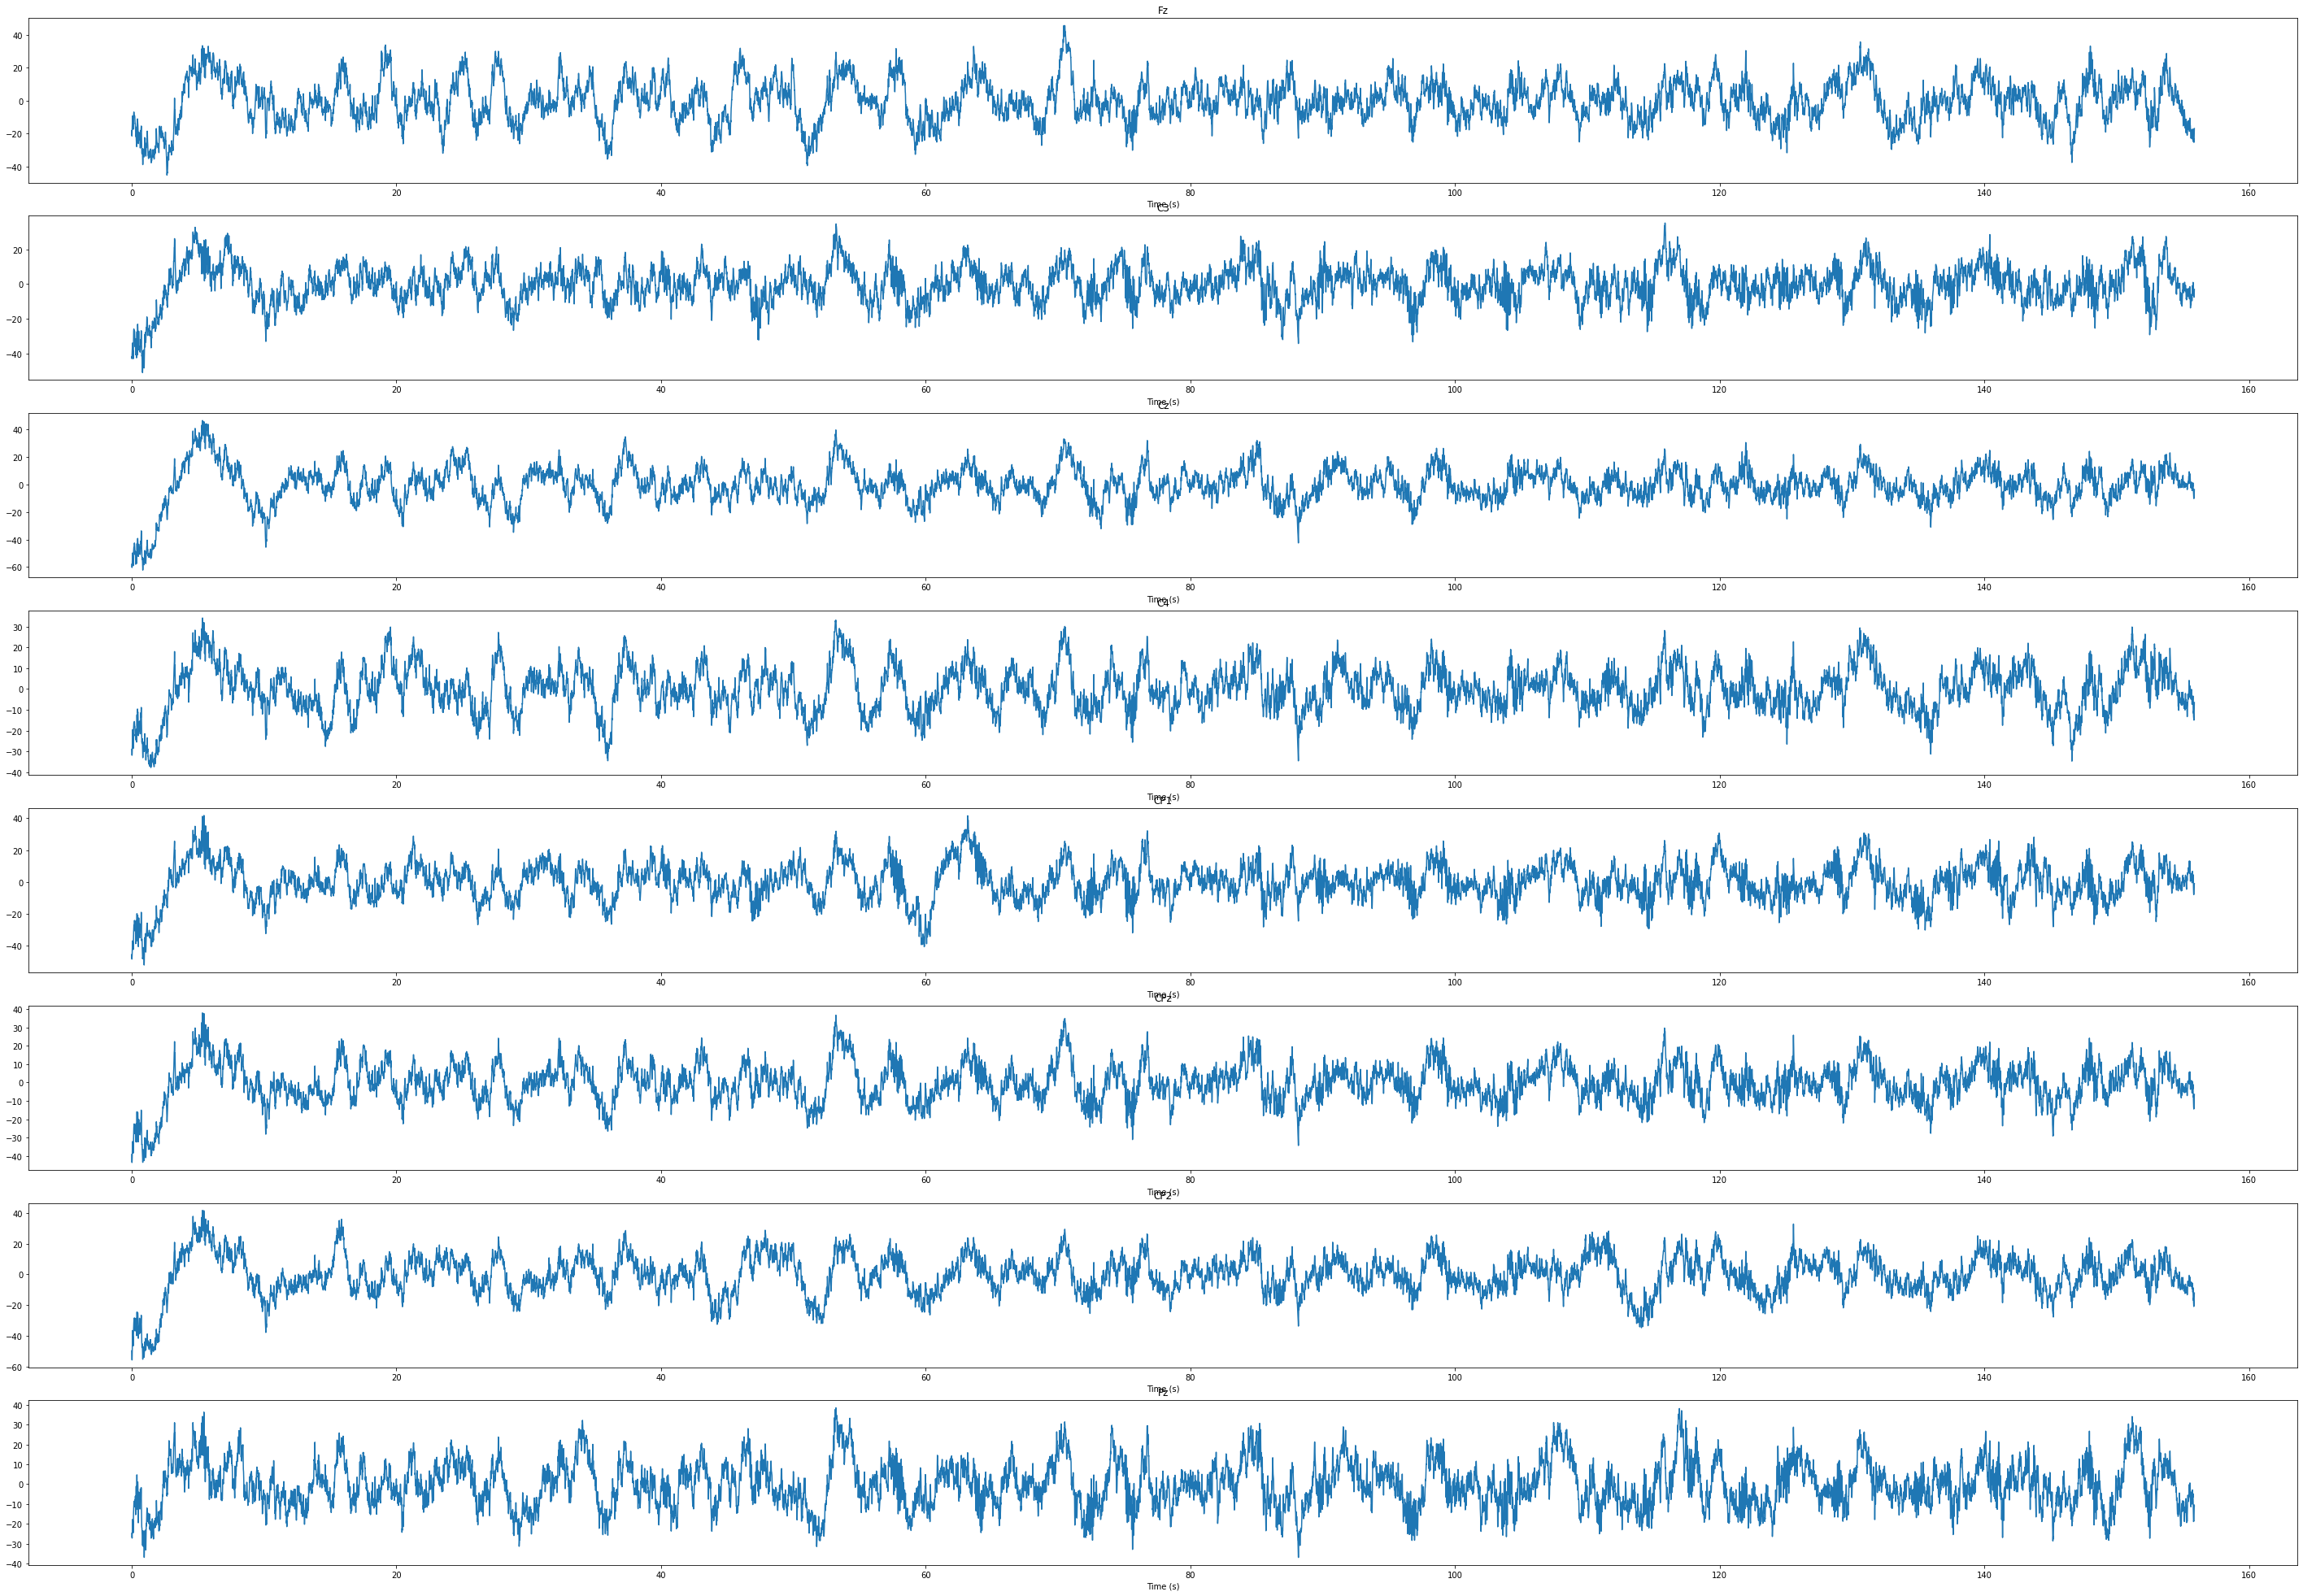

In [11]:
nrows = 8
ncols = 1
t = np.arange(0,sample_data['CP1'].shape[0]/fs,1/fs)
print(t)
fig, ax = plt.subplots(nrows, figsize=(50,35))
counter = 0
display(sample_data)
for i in range(8):
  try:
    channel = EEG_CHANNELS[counter]
    counter = counter + 1 
    ax[i].plot(t,sample_data[channel])
    ax[i].set_title(channel)   
    ax[i].set_xlabel("Time (s)")   
  except:
    continue

Power Spectrum

Text(0.5, 1.0, 'Power spectrum (np.fft.fft)')

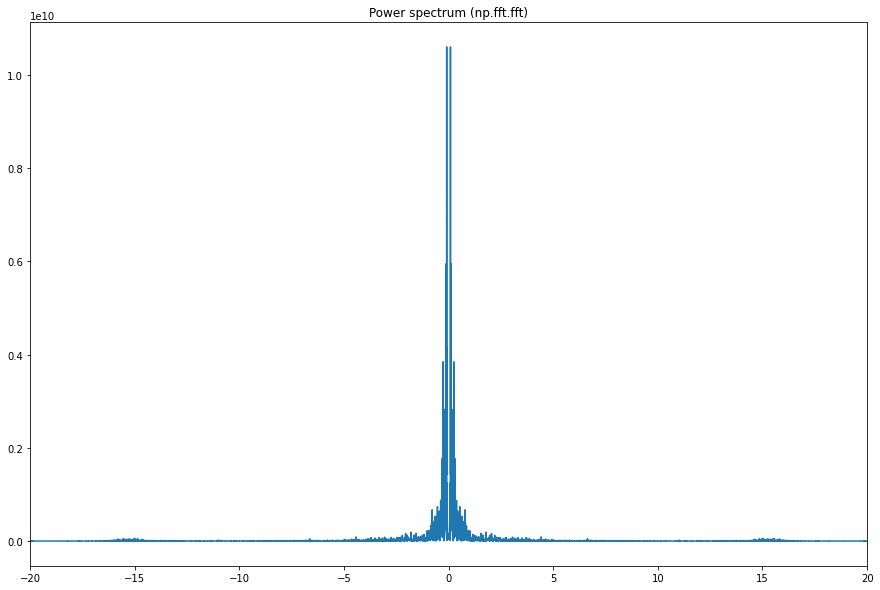

In [12]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

# np.fft.fft
freqs = np.fft.fftfreq(t.size, 1/fs)
idx = np.argsort(freqs)
x = sample_data['CP1']
ps = np.abs(np.fft.fft(x))**2
plt.figure(figsize=(15,10))
plt.plot(freqs[idx], ps[idx])
plt.xlim(-20,20)
plt.title('Power spectrum (np.fft.fft)')

Text(0.5, 1.0, 'Power spectrum (np.fft.fft)')

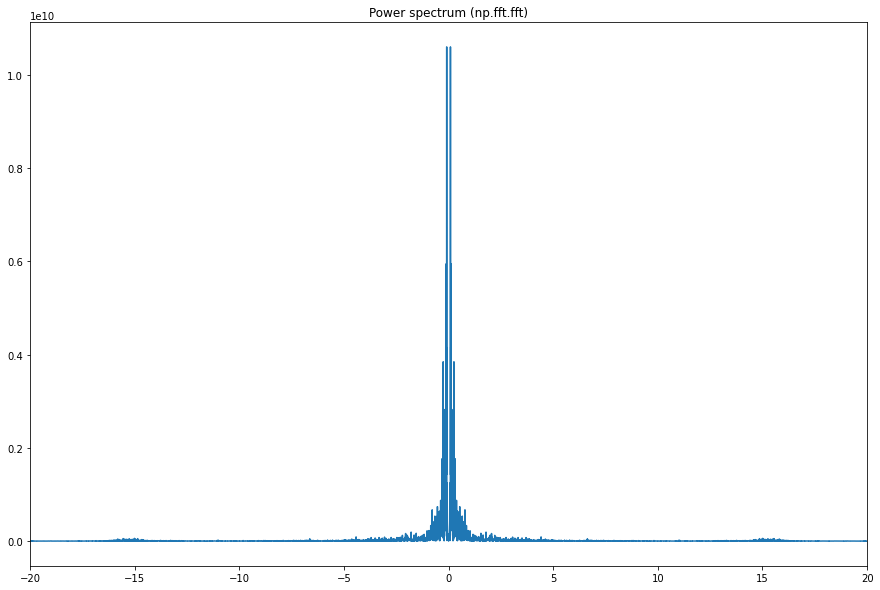

In [13]:
freqs = np.fft.fftfreq(t.size, 1/fs)
idx = np.argsort(freqs)
x = sample_data['CP2'] 
x = x - np.mean(x)
ps = np.abs(np.fft.fft(x))**2
plt.figure(figsize=(15,10))
plt.plot(freqs[idx], ps[idx])
plt.xlim(-20,20)
plt.title('Power spectrum (np.fft.fft)')

In [14]:
sample_data.output.value_counts()

0    39424
3      360
1       60
2       60
Name: output, dtype: int64

In [15]:
t.size

39904

In [16]:
All_channels = np.zeros((8,t.size))
for i, ch in enumerate(EEG_CHANNELS):
  All_channels[i,:] = sample_data[ch]

(<Figure size 1152x1152 with 8 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1555fea550>,
       dtype=object))

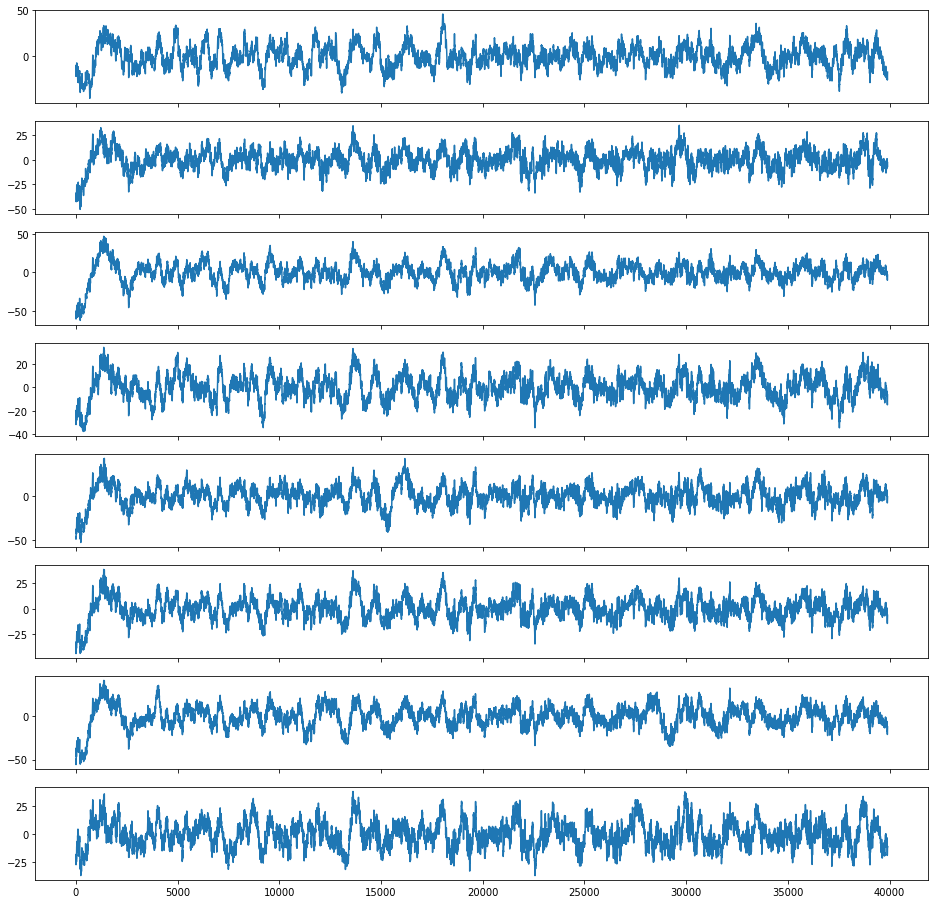

In [17]:
from tsaug.visualization import plot
plot(All_channels)

Segment

In [18]:
# Initialize dict of dict
segmented_data_dict = {**dict.fromkeys(mat_files, {})}
augmented_data_dict = {**dict.fromkeys(mat_files, {})}
for mat_file in mat_files[0:]:
  df = eeg_recordings[mat_file]
  
  n_ch, n_sample = 8, 180
  n_output = len(df[df.output !=0])

  #output a segmented matrix  (number of segments x segment length x channels) for a mat file
  All_segs = np.empty((n_output, 180, 8))

  #initilaize y with length equal total no. of valid output 1,2,3
  y = np.zeros(n_output)

  prev_y = 0
  for output in [1,2,3]:
    
    output_df = df[df.output == output]
    n = len(output_df)

    # create x
    for i, sample_idx in enumerate(output_df.index.values):
      # print(sample_idx)
      # each segment is -100ms to 600ms (128 x 8 )
      #.loc end-index is inclusive, we want the sample right before 600ms mark
      segment = df.drop("output", axis=1).loc[sample_idx-26:
                                                sample_idx+153, :].to_numpy()
      # print(segment.shape)     
      # print(All_segs.shape)                                     
      All_segs[prev_y + i,] = segment

    # create y
    y[prev_y:
      prev_y + n] = output
    prev_y = prev_y + n
    # print(y)

  #save X,y as a dict of dict {matfile1: {X: arr, y: arr}, 
  segmented_data_dict[mat_file] = {
      "X": All_segs,
      "y": y
  }
  augmented_data_dict[mat_file] = {
       "X": All_segs,
      "y": y
  }
  print(mat_file)
  print(segmented_data_dict[mat_file]['X'].shape)
  print(segmented_data_dict[mat_file]['y'].shape)
  print("---")
  # break

P1_high1.mat
(480, 180, 8)
(480,)
---
P2_low1.mat
(480, 180, 8)
(480,)
---
P2_high1.mat
(480, 180, 8)
(480,)
---
P2_high2.mat
(480, 180, 8)
(480,)
---
P2_low2.mat
(480, 180, 8)
(480,)
---
P1_high2.mat
(480, 180, 8)
(480,)
---
P1_low1.mat
(480, 180, 8)
(480,)
---
P1_low2.mat
(480, 180, 8)
(480,)
---


Data Augmentation

In [19]:
from tsaug import TimeWarp, Crop, Quantize, Drift, Reverse, AddNoise
my_augmenter = (
    # random time warping 5 times in parallel
       Drift(max_drift=(0.1, 0.2)) @ 0.2  # with 80% probability, random drift the signal up to 10% - 50%
     + Reverse() @ 0.5  # with 50% probability, reverse the sequence
     + AddNoise(scale=(0.01, 0.05)) @ 0.5  
 )

In [20]:
for i in range(5):
  for mat_file in mat_files[0:]:
    aug_data = 0
    new_labels = 0
    ind = ((segmented_data_dict[mat_file]['y'] == 1) | (segmented_data_dict[mat_file]['y'] == 2))
    req_data = segmented_data_dict[mat_file]['X'][ind]
    req_data = np.swapaxes(req_data, 2, 1)
    new_labels = segmented_data_dict[mat_file]['y'][ind]
    aug_data = my_augmenter.augment(req_data)
    aug_data = np.swapaxes(aug_data,1,2)
    augmented_data_dict[mat_file]['X'] = np.vstack((augmented_data_dict[mat_file]['X'], aug_data))
    augmented_data_dict[mat_file]['y'] = np.hstack((augmented_data_dict[mat_file]['y'], new_labels))

In [21]:
augmented_data_dict['P1_high1.mat']['X'].shape

(1080, 180, 8)

(<Figure size 1152x1152 with 8 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f154b864490>,
       dtype=object))

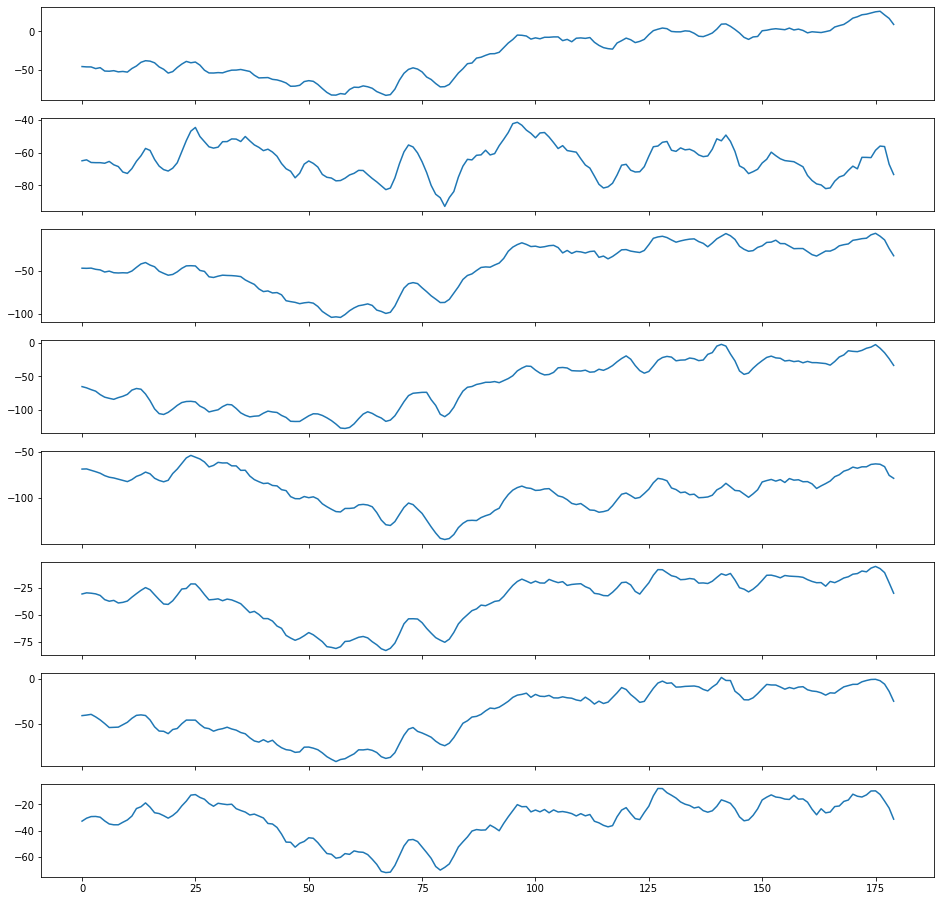

In [106]:
plot(np.swapaxes(augmented_data_dict['P1_high1.mat']['X'][-35],0,1))

In [52]:
P1_X = np.empty((1,180,8))
P1_Y = np.empty((1,))
for mat_file in ["P1_high1.mat","P1_low1.mat"]:
  X = augmented_data_dict[mat_file]['X']
  y = augmented_data_dict[mat_file]['y']
  P1_X = np.vstack((P1_X, X))
  P1_Y =  np.hstack((P1_Y,y))
P1_X = P1_X[1:,:,:]
P1_Y = P1_Y[1:]

In [53]:
P1_X.shape

(2160, 180, 8)

In [54]:
for i in range(P1_X.shape[0]):
  P1_X[i,:,:] = P1_X[i,:,:] - np.average(P1_X[i,0:26,:],axis=0)

Plot Random Signal Windows

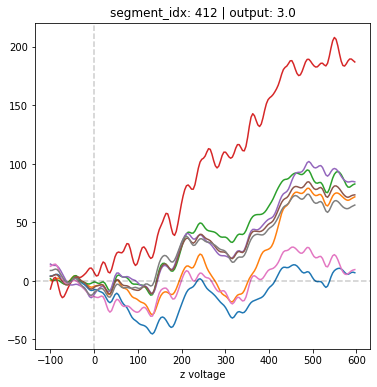

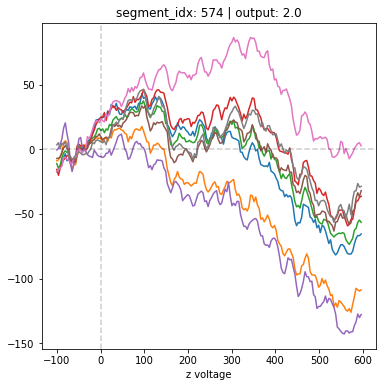

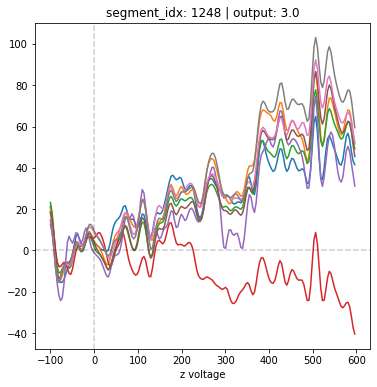

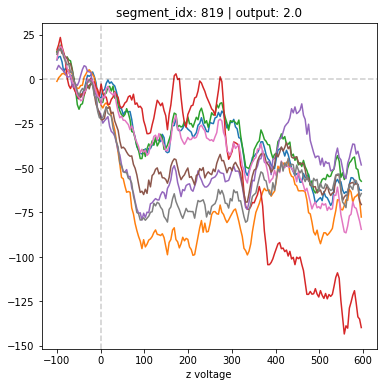

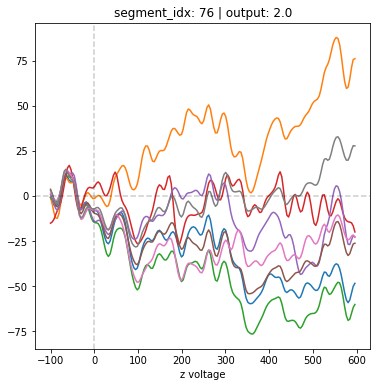

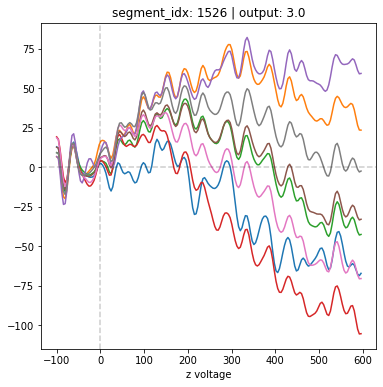

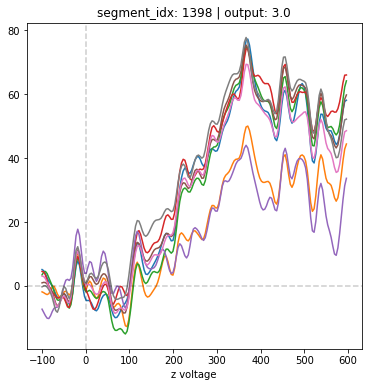

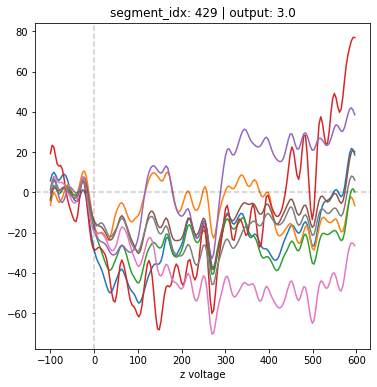

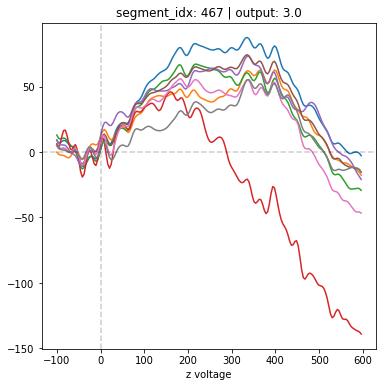

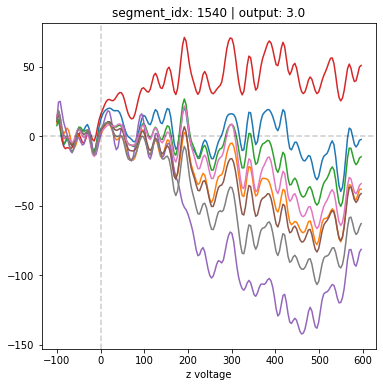

In [55]:
import random
x_plot_arr = P1_X #np.concatenate([X_train, X_test], axis=0)
for _ in range(10):
  seg = random.choice(np.arange(len(x_plot_arr)))
  output = P1_Y[seg]

  plt.figure(figsize=(6,6))
  for i in x_plot_arr[seg,:,:].T:
    # print(i.shape)
    #26 samples: 100s
    plt.plot(np.arange(-100, 600, 700/180), i)
  plt.axvline(0, c='k', alpha=0.2, linestyle="--")
  plt.axhline(0, c='k', alpha=0.2, linestyle="--")
  plt.title("segment_idx: {} | output: {}".format(seg, output))
  plt.xlabel('ms')
  plt.xlabel('z voltage')

Plot Class Average

(180, 8)
(180, 8)
(180, 8)


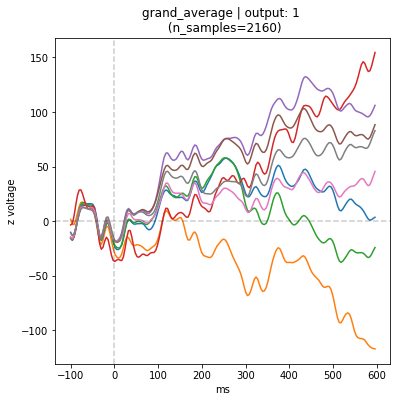

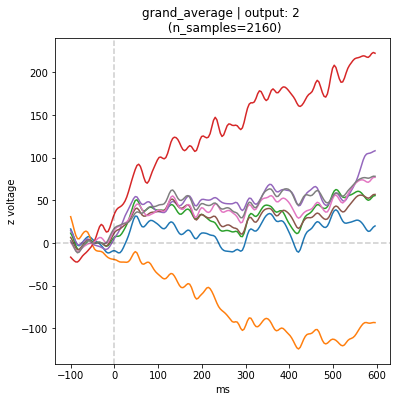

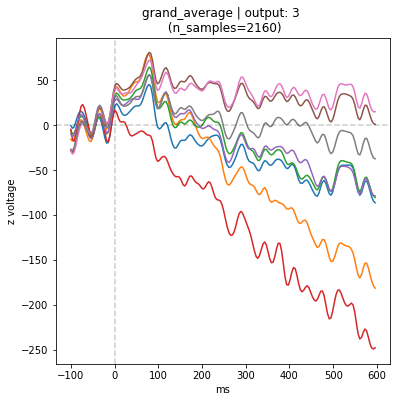

In [56]:
x_plot_arr, y_plot_arr = P1_X, P1_Y
for output in [1, 2,3]:
  X_average = np.average(x_plot_arr[np.argwhere(y_plot_arr==output)][0], axis=0)
  print(X_average.shape)
  seg = "grand_average"
  plt.figure(figsize=(6,6))
    #26 samples: 100s
  for ch in np.arange(8):
    plt.plot(np.arange(-100, 600, 700/180), X_average.T[ch])
  plt.axvline(0, c='k', alpha=0.2, linestyle="--")
  plt.axhline(0, c='k', alpha=0.2, linestyle="--")
  plt.title("{} | output: {} \n (n_samples={})".format(seg, output, len(x_plot_arr)))
  plt.xlabel('ms')
  plt.ylabel('z voltage')

Significance Test (Mann Whitney)

In [182]:
x1 = segmented_data_dict['P1_high1.mat']['X'][19]
x2 = segmented_data_dict['P1_high1.mat']['X'][61]
x3 = segmented_data_dict['P1_high1.mat']['X'][130]

In [113]:
from scipy.stats import mannwhitneyu
U1, p = mannwhitneyu(x1[0], x2[0], method="exact")

In [188]:
win = 30
overalp = 20
pvals = []
I = []
for i in range(0,180-win-1,10):
  I.append(i)
  seg1 = x1[i:i+win,0]
  seg2 = x3[i:i+win,0]
  _, p = mannwhitneyu(seg1, seg2, method="exact")
  pvals.append(p)


In [189]:
sig = [i*10 for i,j in enumerate(pvals) if j <= 0.05 ]
sig

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140]

Text(0, 0.5, 'z voltage')

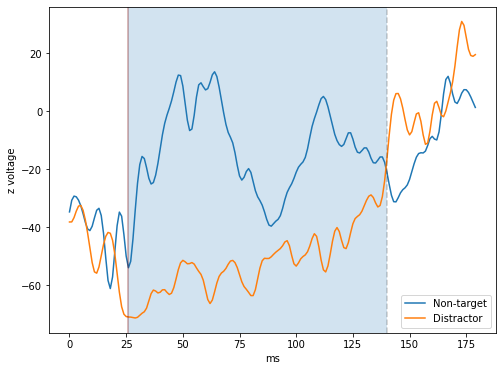

In [191]:
time = np.arange(0,180)
plt.figure(figsize=(8,6))
plt.plot(time,x1[:,0])
plt.plot(time,x3[:,0])
# plt.plot(x3[:,0])

# plt.axvline(0, c='k', alpha=0.2, linestyle="--")
plt.axvline(26, c='r', alpha=0.2, linestyle="-")

# plt.axvline(80, c='k', alpha=0.2, linestyle="--")
plt.axvline(140, c='k', alpha=0.2, linestyle="--")

plt.axvline(26, c='k', alpha=0.2, linestyle="-")
# plt.axvline(140, c='k', alpha=0.2, linestyle="--")
plt.legend(['Non-target', 'Distractor',])
# plt.title("{} | output: {} \n (n_samples={})".format(seg, output, len(x_plot_arr)))
plt.xlabel('ms')
# plt.axvspan(0, 30, alpha=0.2)
plt.axvspan(26, 140, alpha=0.2)
plt.ylabel('z voltage')

In [166]:
win = 30
overalp = 20
pvals = []
I = []
for i in range(0,180-win-1,10):
  I.append(i)
  seg1 = x2[i:i+win,0]
  seg2 = x3[i:i+win,0]
  _, p = mannwhitneyu(seg1, seg2, method="exact")
  pvals.append(p)


In [167]:
sig = [i*10 for i,j in enumerate(pvals) if j <= 0.05 ]
sig

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140]

Text(0, 0.5, 'z voltage')

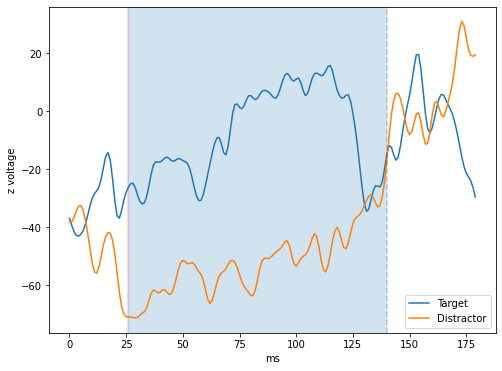

In [184]:
plt.figure(figsize=(8,6))
plt.plot(x2[:,0])
plt.plot(x3[:,0])
# plt.plot(x3[:,0])

# plt.axvline(0, c='k', alpha=0.2, linestyle="--")
plt.axvline(26, c='r', alpha=0.2, linestyle="-")
# plt.axvline(40, c='k', alpha=0.2, linestyle="--")
# plt.axvline(100, c='k', alpha=0.2, linestyle="--")
# plt.axvline(130, c='k', alpha=0.2, linestyle="--")
plt.axvline(140, c='k', alpha=0.2, linestyle="--")
plt.legend(['Target', 'Distractor',])
# plt.title("{} | output: {} \n (n_samples={})".format(seg, output, len(x_plot_arr)))
# plt.axvspan(0, 10, alpha=0.2)
# plt.axvspan(40, 100, alpha=0.2)
plt.axvspan(26, 140, alpha=0.2)
plt.xlabel('ms')
plt.ylabel('z voltage')

Test Set

In [60]:
P1_X_test = np.empty((1,180,8))
P1_Y_test = np.empty((1,))
for mat_file in ["P1_high2.mat","P1_low2.mat"]:
  X = augmented_data_dict[mat_file]['X']
  y = augmented_data_dict[mat_file]['y']
  P1_X_test = np.vstack((P1_X_test, X))
  P1_Y_test =  np.hstack((P1_Y_test,y))
P1_X_test = P1_X_test[1:,:,:]
P1_Y_test = P1_Y_test[1:]

In [61]:
P1_X_test.shape

(2160, 180, 8)

In [62]:
for i in range(P1_X_test.shape[0]):
  P1_X_test[i,:,:] = P1_X_test[i,:,:] - np.average(P1_X_test[i,0:26,:],axis=0)

Feature Engineering and Model Training

In [63]:
X_train = P1_X
Y_train = P1_Y

X_test = P1_X_test
Y_test = P1_Y_test

In [64]:
X_train.shape

(2160, 180, 8)

In [65]:
import pyriemann
from sklearn.model_selection import cross_val_score

# mat_file = "P1_high1.mat"
# display(eeg_recordings[mat_file])
#code for querying X,y for a matfile
X_data = X_train #segmented_data_dict[mat_file]['X']
y_data = Y_train #segmented_data_dict[mat_file]['y']

print(X_data.shape)
print(y_data.shape)
# load your data
X = X_data.swapaxes(1,2) # your EEG data, in format Ntrials x Nchannels X Nsamples
y = y_data # the labels

# estimate covariances matrices
cov = pyriemann.estimation.Covariances().fit_transform(X)

# cross validation
mdm = pyriemann.classification.MDM()

accuracy = cross_val_score(mdm, cov, y, cv=10)

print(accuracy.mean())
print(X.shape)

(2160, 180, 8)
(2160,)
0.4796296296296297
(2160, 8, 180)


In [90]:
from pyriemann.estimation import Covariances, ERPCovariances,XdawnCovariances,CospCovariances,HankelCovariances
from pyriemann.tangentspace import TangentSpace

from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.utils import class_weight
from mne.decoding import CSP #common spatial pattern
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

# dict(zip(unique, counts))


X_train_reshaped = X_train.swapaxes(1,2)
X_test_reshaped = X_test.swapaxes(1,2)

x = np.vstack((X_train_reshaped, X_test_reshaped))
y = np.hstack((Y_train, Y_test))

covest = Covariances()#('lwf', svd=5)
lda = LinearDiscriminantAnalysis()
ts = TangentSpace(metric="riemann")
csp = CSP()
# class_weight={1:2.69662921, 2:2.69662921, 3:0.44198895}
svc = SVC(kernel='linear')# class_weight={1:1, 2:100, 3:1/10})
# mlp = MLPClassifier(random_state=42, max_iter=300) #did not converge
mlp =  MLPClassifier(hidden_layer_sizes=(10,), 
                     max_iter=100, 
                     alpha=1e-4,
                     solver='sgd', 
                     shuffle = True,
                     verbose=10, 
                     tol=1e-4, 
                     random_state=42,
                     learning_rate_init=.1
                     )
xg = XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
gb = GradientBoostingClassifier()
dt = DecisionTreeClassifier()
dtr = DecisionTreeRegressor()
rf = RandomForestClassifier(class_weight = 'balanced')
# Main
clf = make_pipeline(
    covest,
    ts, 
    # csp,
    #StandardScaler(),
    lda,
    # StandardScaler(), 
    # LogisticRegression(),
    # svc,
    # mlp
    # xg
  # gb
    # dt
    # dtr
    #  rf
  ).fit(x,y)


accuracy = cross_val_score(clf ,x,y, cv=10)
print(accuracy.mean())

# # fit model
# print(X_train_reshaped.shape)
# clf.fit(X_train_reshaped, Y_train)
# # make predictions
# y_pred = clf.predict(X_test_reshaped)
# print(y_pred.shape)
# # evaluate predictions
# accuracy = accuracy_score(Y_test, y_pred)
# print('Accuracy: %.3f' % (accuracy * 100))

# #AUC Score, Precision, Recall

# cm = confusion_matrix(Y_test, y_pred)
# ConfusionMatrixDisplay(cm, display_labels=clf.classes_).plot()
# plt.show()

0.4773148148148148


Averaging

In [32]:
avg_dict = {}
for mat_file in mat_files[0:]:
  a = {}
  dt = augmented_data_dict[mat_file]
  sig = dt['X']
  avg = np.mean(sig, axis=2)
  a['X'] = avg
  a['Y'] = dt['y']
  avg_dict[mat_file] = a

In [33]:
P1_X_avg = np.empty((1,180))
P1_Y_avg = np.empty((1,))
for mat_file in ["P1_high1.mat","P1_low1.mat"]:
  X = avg_dict[mat_file]['X']
  y = avg_dict[mat_file]['Y']
  P1_X_avg = np.vstack((P1_X_avg, X))
  P1_Y_avg =  np.hstack((P1_Y_avg,y))
P1_X_avg = P1_X_avg[1:,:]
P1_Y_avg = P1_Y_avg[1:]

In [34]:
P1_X_avg.shape

(2160, 180)

In [35]:
P1_X_avg_test = np.empty((1,180))
P1_Y_avg_test = np.empty((1,))
for mat_file in ["P1_high2.mat","P1_low2.mat"]:
  X = avg_dict[mat_file]['X']
  y = avg_dict[mat_file]['Y']
  P1_X_avg_test = np.vstack((P1_X_avg_test, X))
  P1_Y_avg_test =  np.hstack((P1_Y_avg,y))
P1_X_avg_test = P1_X_avg_test[1:,:]
P1_Y_avg_test = P1_Y_avg_test[1:]

In [36]:
P1_X_avg_test.shape

(2160, 180)

In [37]:
x_train = P1_X_avg
x_test = P1_X_avg_test
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

y_train = P1_Y_avg
y_test = P1_X_avg_test

In [38]:
idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

In [39]:
y_train = tf.one_hot(indices=y_train, depth=3)
y_test = tf.one_hot(indices=y_test, depth=3)

In [40]:
import keras
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    gap = keras.layers.GlobalAveragePooling1D()(conv1)

    gap = keras.layers.Dense(1024, activation="relu")(gap)
    gap = keras.layers.Dense(256, activation="relu")(gap)
    output_layer = keras.layers.Dense(3, activation="relu")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=x_train.shape[1:])

# keras.utils.plot_model(model, show_shapes=True)

In [41]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 1)]          0         
                                                                 
 conv1d (Conv1D)             (None, 180, 64)           256       
                                                                 
 batch_normalization (BatchN  (None, 180, 64)          256       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 180, 64)           0         
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1024)              66560 

In [47]:
embed_dim = 128
lstm_out = 1024
batch_size = 32

model = keras.Sequential()
# model.add(keras.layers.Embedding(180, embed_dim,input_length = x_train.shape[1]))
model.add(keras.layers.LSTM(lstm_out, input_shape=(180,1)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(256,activation='relu'))

model.add(keras.layers.Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1024)              4202496   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               262400    
                                                                 
 dense_5 (Dense)             (None, 3)                 771       
                                                                 
Total params: 4,465,667
Trainable params: 4,465,667
Non-trainable params: 0
_________________________________________________________________
None


In [48]:
epochs = 20
batch_size = 64

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="Adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=[x_test,y_test],
    verbose=1,
)

Epoch 1/20
27/27 [==============================] - 418s 15s/step - loss: 0.6399 - accuracy: 0.3414 - val_loss: 0.5191 - val_accuracy: 0.3102 - lr: 0.0010
Epoch 2/20
27/27 [==============================] - 383s 14s/step - loss: 0.7251 - accuracy: 0.3362 - val_loss: 0.7271 - val_accuracy: 0.3241 - lr: 0.0010
Epoch 3/20
27/27 [==============================] - 387s 14s/step - loss: 0.8677 - accuracy: 0.3160 - val_loss: 0.5035 - val_accuracy: 0.3449 - lr: 0.0010
Epoch 4/20
27/27 [==============================] - 379s 14s/step - loss: 0.8066 - accuracy: 0.3310 - val_loss: 1.5135 - val_accuracy: 0.3241 - lr: 0.0010
Epoch 5/20
27/27 [==============================] - 382s 14s/step - loss: 1.1529 - accuracy: 0.3385 - val_loss: 0.4792 - val_accuracy: 0.3241 - lr: 0.0010
Epoch 6/20
27/27 [==============================] - 383s 14s/step - loss: 1.4421 - accuracy: 0.3200 - val_loss: 1.1916 - val_accuracy: 0.3449 - lr: 0.0010
Epoch 7/20
27/27 [==============================] - 390s 14s/step - lo

KeyboardInterrupt: ignored